
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [208]:
import pandas as pd

In [209]:
medical_df=pd.read_csv('medical-charges.csv')

In [210]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [211]:
import matplotlib.pyplot as plt
import plotly.express as px

In [212]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   facet_col='sex',
                   barmode="overlay",
                   title='Distribution of Сharges by Sex')
fig.update_layout(bargap=0.1, width=1000,height=500)
fig.show()

### Висновок 2.1
Чоловіки та жінки мають cхожі розподіли, майже однакові qv25 і median (4.5K та 9,5К відповідно).
А от qv75 і далі (правий хвіст) більші у чоловіків.
Багато outliers.

Sex сам по собі слабкий предиктор.

In [213]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   barmode="overlay",
                   title='Distribution of Sex')
fig.update_layout(width=900,height=450, bargap=0.1)
fig.show()

In [214]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   facet_col='region',
                   title='Distribution of Sex')
fig.update_layout(bargap=0.1, width=900,height=450)
fig.show()

### Висновок 2.2
Розподіли схожі: qv25, median майже однакові. southeast має найбільший правий хвіст.
Нема доказів, що region має сильний предиктовий фактор.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

##3.1 Distribution Region Count by Smoker

In [215]:
fig = px.histogram(medical_df,
                   x='region',
                   color='smoker',
                   title='Distribution Region by Smoker')
fig.update_layout(bargap=0.1, width=800, height=400)
fig.show()

In [216]:
fig = px.histogram(medical_df,
                   x='region',
                   color='smoker',
                   facet_col='sex',
                   barmode='overlay',
                   title='Distribution Region by Smoker')
fig.update_layout(bargap=0.1, width=800, height=400)
fig.show()

### Висновок 3.1
Серед southeast більш високий %курців, в чоловіків більший, аніж серед жінок (можливо через те, вони і мали більший правий хвіст в обидвох попередніх зрізах).

##3.2 Distribution Children Count by Smoker

In [217]:
fig = px.histogram(medical_df,
                   x='children',
                   color='smoker',
                   title='Distribution Children Count by Smoker'
                   )
fig.update_layout(bargap=0.1, width=800, height=400)
fig.show()

### Висновок 3.2
% курців однаковий серед людей з різною кількістю дітей


**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [218]:
fig=px.histogram(medical_df,
                 x='charges',
                 color='children',
                 marginal='violin',
                 facet_col='children'
                 )
fig.update_layout(width=800, height=400)
fig.show()

In [219]:
fig=px.scatter(medical_df,
                 color='children',
                 x='charges',
                 opacity=0.8,
                 title='Children Count vs. Charges')
fig.update_layout(width=800, height=400)


### Висновок 4
Усі розподіли є правозмішені та мають довгі праві хвости. Високі charges зустрічаються як серед людей без дітей, так і в інших випадках. Немає ознак лінійної залежності

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [220]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [221]:
def estimate_charges(age, w, b):
    return w * age + b

In [222]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

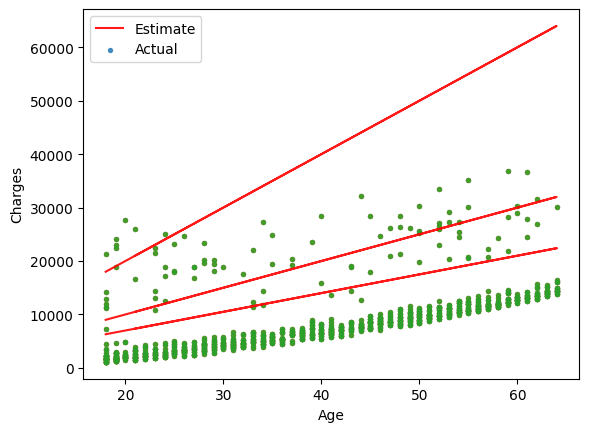

In [223]:

try_parameters (non_smoker_df, 1000, 0)
try_parameters (non_smoker_df, 500, 0)
try_parameters (non_smoker_df, 350, 0) #найкращий коєфіціент


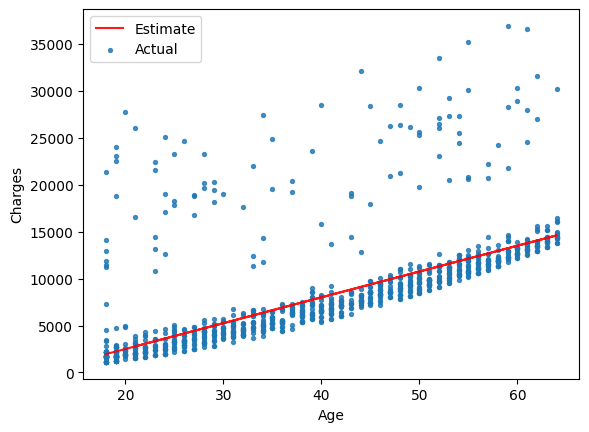

In [224]:

# try_parameters (non_smoker_df, 350, -5000)
# try_parameters (non_smoker_df, 350, -3000)
# try_parameters (non_smoker_df, 300, -3000)
# try_parameters (non_smoker_df, 265, -3000)
try_parameters (non_smoker_df, 275, -3000)


* y=w*x+b
* x=20 y~=2500 w=275
* 2500=275*20+b
* b=2500-275*20
* b~=-3000


**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [225]:
import numpy as np

In [226]:
def rmse(targets, predicted):
    return np.sqrt(np.mean(np.square(targets - predicted)))

In [227]:
w=275
b=-3000

In [228]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [229]:
rmse(targets, predicted)

np.float64(4702.6414178153345)

# Висновок 6
Мені подобається, як червона лінія описує дані, опосередовані внизу. Хоча я розумію, що "виброси" вона не описує зовсім. Ці значення і дають великі відхилення. Припускаю, що має бути ще параметр виду с*z, де с бути приймати значення 0 та 1.